In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Samples pretrained with VAE

In [81]:
epochs=25

real_vae=np.empty([1,64*64*3])
fake_vae=np.empty([1,64*64*3])
for e in range(15,epochs):
    real_path="outputs/vae/real_images"+str(e)+"_vae.csv"
    real0=pd.read_csv(real_path,header=None)
    real_vae=np.append(real_vae,real0,axis=0)
    
    fake_path="outputs/vae/fake_images"+str(e)+"_vae.csv"
    fake0=pd.read_csv(fake_path,header=None)
    fake_vae=np.append(fake_vae,fake0,axis=0)
    
real_vae.shape,fake_vae.shape

((161, 12288), (161, 12288))

## Samples of normal DCGAN

In [82]:
epochs=25
real=np.empty([1,64*64*3])
fake=np.empty([1,64*64*3])
for e in range(15,epochs):
    real_path="outputs/standard/real_images"+str(e)+"_nG"+str(1)+".csv"
    real0=pd.read_csv(real_path,header=None)
    real=np.append(real,real0,axis=0)
    
    fake_path="outputs/standard/fake_images"+str(e)+"_nG"+str(1)+".csv"
    fake0=pd.read_csv(fake_path,header=None)
    fake=np.append(fake,fake0,axis=0)

real.shape,fake.shape

((161, 12288), (161, 12288))

In [65]:
scaler = StandardScaler()
real_vae=scaler.fit_transform(real_vae)
real=scaler.fit_transform(real)

fake_vae=scaler.fit_transform(fake_vae)
fake=scaler.fit_transform(fake)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## PCA
First we reduce dimension with PCA

Sum of explained variance for real: 0.700183378893
Sum of explained variance for fake: 0.717003919557


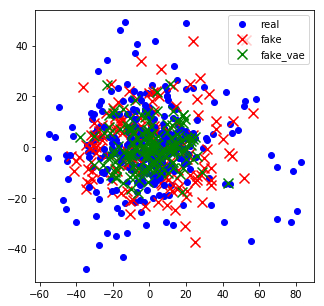

In [84]:
pca = PCA(n_components=10)
pca.fit(real)
real_pca = pca.transform(real)
pca.fit(real_vae)
real_vae_pca = pca.transform(real_vae)
print('Sum of explained variance for real:',pca.explained_variance_ratio_.sum())

pca.fit(fake)
fake_pca = pca.transform(fake)
pca.fit(fake_vae)
fake_vae_pca = pca.transform(fake_vae)
print('Sum of explained variance for fake:',pca.explained_variance_ratio_.sum())

plt.figure( figsize=(5,5) )
plt.scatter(real_pca[:,0],real_pca[:,1],color='b',label='real',marker='o')
plt.scatter(fake_pca[:,0],fake_pca[:,1], color='r',label='fake',marker='x',s=100)

plt.scatter(real_vae_pca[:,0],real_vae_pca[:,1],color='b',marker='o')
plt.scatter(fake_vae_pca[:,0],fake_vae_pca[:,1],color='g',label='fake_vae',marker='x',s=100)
plt.legend()
plt.show()

## T-SNE

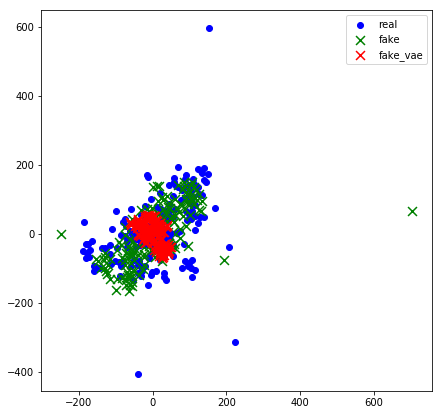

In [85]:
tsne=TSNE(n_components=2,perplexity=5)
real_tsne=tsne.fit_transform(real)
fake_tsne=tsne.fit_transform(fake)

real_vae_tsne=tsne.fit_transform(real_vae)
fake_vae_tsne=tsne.fit_transform(fake_vae)

plt.figure( figsize=(7,7) )
plt.scatter(real_tsne[:,0],real_tsne[:,1],color='b',label='real',marker='o')
plt.scatter(fake_tsne[:,0],fake_tsne[:,1], color='g',label='fake',marker='x',s=80)

plt.scatter(real_vae_tsne[:,0],real_vae_tsne[:,1],color='b',marker='o')
plt.scatter(fake_vae_tsne[:,0],fake_vae_tsne[:,1],color='r',label='fake_vae',marker='x',s=80)

plt.legend()
plt.show()

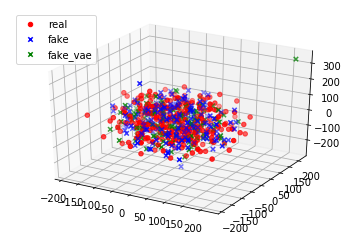

In [86]:
from mpl_toolkits.mplot3d import Axes3D
tsne=TSNE(n_components=3,perplexity=5)
real_tsne=tsne.fit_transform(real)
fake_tsne=tsne.fit_transform(fake)

real_vae_tsne=tsne.fit_transform(real_vae)
fake_vae_tsne=tsne.fit_transform(fake_vae)

fig = plt.figure()
plt.figure( figsize=(10,10) )
ax = fig.add_subplot(111, projection='3d')

ax.scatter(real_tsne[:,0], real_tsne[:,1], real_tsne[:,2], c='r', marker='o',label='real')
ax.scatter(fake_tsne[:,0], fake_tsne[:,1], fake_tsne[:,2], c='b', marker='x',label='fake')

ax.scatter(real_vae_tsne[:,0], real_vae_tsne[:,1], real_vae_tsne[:,2], c='r', marker='o')
ax.scatter(fake_vae_tsne[:,0], fake_vae_tsne[:,1], fake_vae_tsne[:,2], c='g', marker='x',label='fake_vae')
ax.legend()
#ax.set_xlabel('X Label')

plt.show();

### With data passed first through PCA

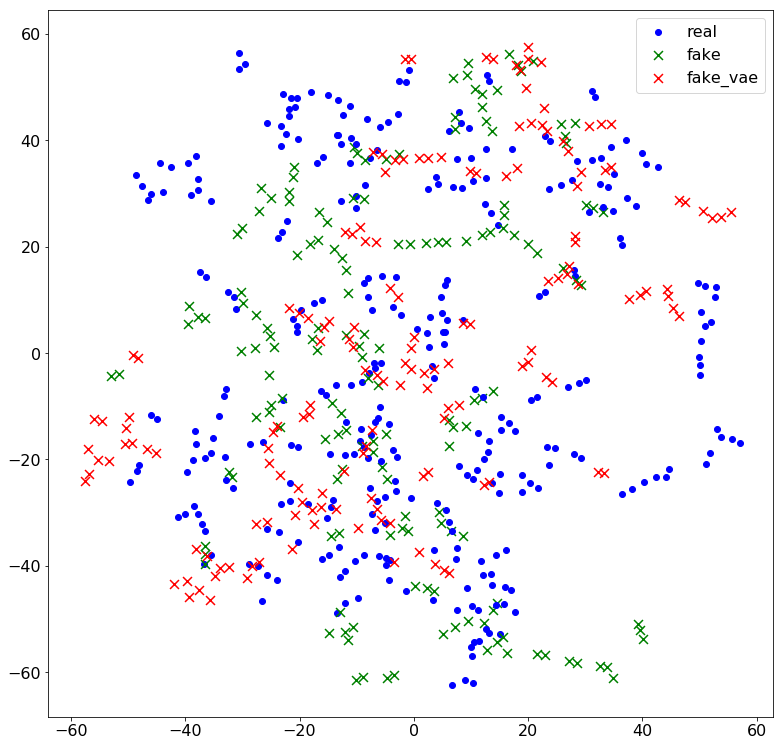

In [105]:
tsne=TSNE(n_components=2,perplexity=3)
real_tsne_p=tsne.fit_transform(real_pca)
fake_tsne_p=tsne.fit_transform(fake_pca)

real_vae_tsne_p=tsne.fit_transform(real_vae_pca)
fake_vae_tsne_p=tsne.fit_transform(fake_vae_pca)

plt.figure(figsize=(13,13) )
plt.scatter(real_tsne_p[:,0],real_tsne_p[:,1],color='b',label='real')
plt.scatter(fake_tsne_p[:,0],fake_tsne_p[:,1],color='g',label='fake',marker='x',s=80)

plt.scatter(real_vae_tsne_p[:,0],real_vae_tsne_p[:,1],color='b',marker='o')
plt.scatter(fake_vae_tsne_p[:,0],fake_vae_tsne_p[:,1],color='r',label='fake_vae',marker='x',s=80)
#plt.xlim(-200)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('tsne_vae.eps', format='eps', dpi=1200)
plt.show()

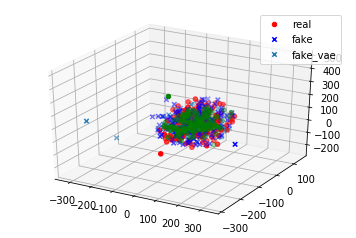

In [88]:
tsne=TSNE(n_components=3,perplexity=5)
real_tsne_p=tsne.fit_transform(real_pca)
fake_tsne_p=tsne.fit_transform(fake_pca)

real_vae_tsne_p=tsne.fit_transform(real_vae_pca)
fake_vae_tsne_p=tsne.fit_transform(fake_vae_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(real_tsne_p[:,0], real_tsne_p[:,1], real_tsne_p[:,2], c='r', marker='o',label='real')
ax.scatter(fake_tsne_p[:,0], fake_tsne_p[:,1], fake_tsne_p[:,2], c='b', marker='x',label='fake')

ax.scatter(real_vae_tsne_p[:,0],real_vae_tsne_p[:,1],real_vae_tsne_p[:,2], color='g',marker='o')
ax.scatter(fake_vae_tsne_p[:,0],fake_vae_tsne_p[:,1],fake_vae_tsne_p[:,2],label='fake_vae',marker='x')

ax.legend()
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

# Plot probabilities

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


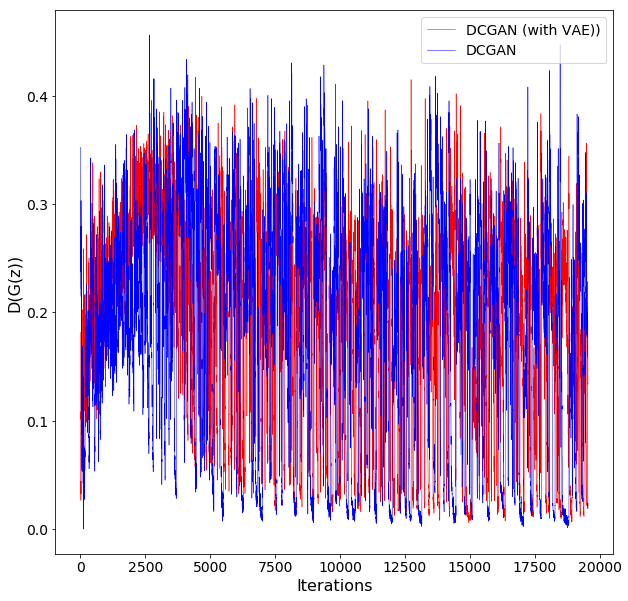

In [92]:
probs_vae=pd.read_csv("outputs/vae/probs_vae.csv",header=None)
probs=pd.read_csv("outputs/standard/probs_nG1.csv",header=None)

plt.figure(figsize=(10,10))
plt.plot(pd.rolling_mean(probs_vae[0],window=10),linewidth=.5, color='r',label='DCGAN (with VAE))')
plt.plot(pd.rolling_mean(probs[0],window=10),linewidth=.5, color='b',label='DCGAN')
plt.legend( fontsize=14)
plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('D(G(z))', fontsize=16)
plt.savefig('probs_vae.eps', format='eps', dpi=1200)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """


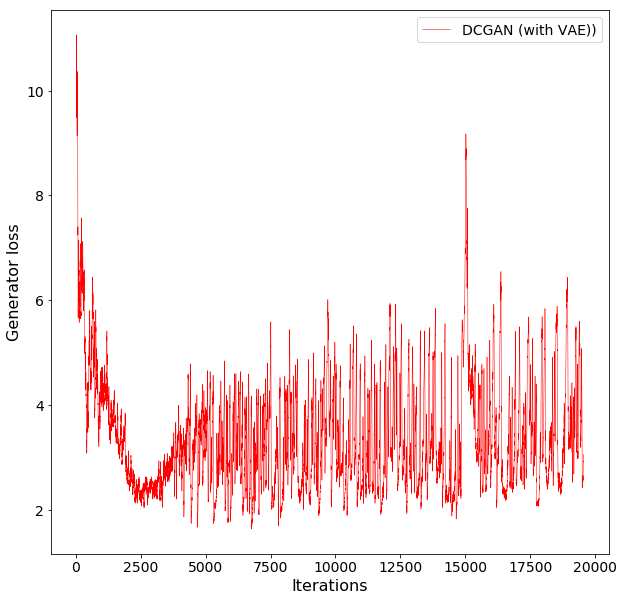

In [104]:
loss_vae=pd.read_csv("outputs/vae/loss_vae.csv",header=None)
loss=pd.read_csv("outputs/standard/loss.csv",header=None)

plt.figure(figsize=(10,10))
plt.plot(pd.rolling_mean(loss_vae[1],window=20),linewidth=.5, color='r',label='DCGAN (with VAE))')
#plt.plot(pd.rolling_mean(probs[1],window=10),linewidth=.5, color='b',label='DCGAN')
plt.legend( fontsize=14)
plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Generator loss', fontsize=16)
plt.savefig('loss_vae.eps', format='eps', dpi=1200)